As the name of the problem suggests, this problem is an extension of the Permutation problem. The problem is different from the previous permutation problem on the condition that the input array can contain duplicates.

The key to solve the problem is still the backtracking algorithm. However, we need some adaptation to ensure that the enumerated solutions generated from our backtracking exploration do not have any duplicates.

As a reminder, backtracking is a general algorithm for finding all (or some) solutions to some problems with constraints. It incrementally builds candidates to the solutions, and abandons a candidate as soon as it determines that the candidate cannot possibly lead to a solution.

In this article, we will present a yet another backtracking solution to solve the problem.

### Approach 1: Backtracking with Groups of Numbers

**Intuition**

First of all, let us review the general idea of permutation with an example.

Given the input array [1, 1, 2], to generate a permutation of the array, we could follow the *Depth-First Search (DFS)* approach, or more precisely the backtracking technique as one will see later.

> The idea is that we pick the numbers one by one. For a permutation of length NN, we would then need NN stages to generate a valid permutation. At each stage, we need to pick one number into the permutation, out of the remaining available numbers. Later at the same stage, we will try out all available choices. By trying out, we progressively build up candidates to the solution, and revert each choice with another alternative until there is no more choice.

Let us walk through the example with paper and pencil, as follows:

* Given the input of [1, 1, 2], at the first stage, we have 2 choices to pick a number as the first number in the final permutation, i.e. 1 and 2. Suppose that we pick the number 1, now the remaining numbers would become [1, 2]. Note: The reason that we have only 2 choices instead of 3, is that there is a duplicate in the given input. Picking any of the duplicate numbers as the first number of the permutation would lead us to the same permutation at the end. Should the numbers in the array be all unique, we would then have the same number of choices as the length of the array.

* At the second stage, we now then have again 2 choices, i.e. [1, 2]. Let us pick again the number 1, which leaves us the only remaining number 2.

* Now at the third stage, we have only one candidate number left, i.e. [2]. We then pick the last remaining number, which leads to a final permutation sequence of [1, 1, 2].

* Moreover, we need to revisit each of the above stages, and make a different choice in order to try out all possibilities. The reversion of the choices is what we call backtracking.

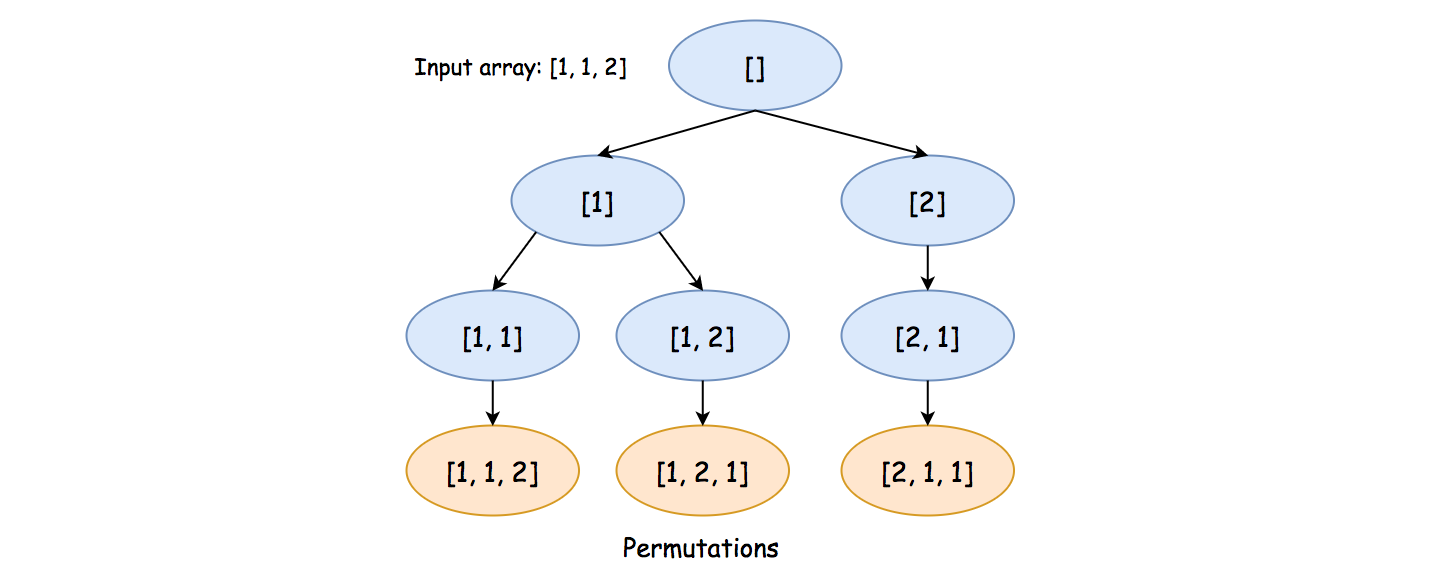

In [1]:
from IPython.display import display, Image
display(Image(filename='47_permutations.png'))

> A key insight to avoid generating any redundant permutation is that at each step rather than viewing each number as a candidate, we consider each unique number as the true candidate. For instance, at the very beginning, given in the input of [1, 1, 2], we have only two true candidates instead of three.

### Algorithm

Given the above insight, in order to find out all the unique numbers at each stage, we can build a hash table (denoted as counter), with each unique number as the key and its occurrence as the corresponding value.

To implement the algorithm, first we define a function called backtrack(comb, counter) which generates all permutations, starting from the current combination (comb) and the remaining numbers (counter).

Once the function is implemented, it suffices to invoke the function with the initial empty combination and the hash table we built out of the input array, to solve the problem.

Here are some sample implementations.

In [9]:
from collections import Counter

class Solution:
    def permuteUnique(self, nums):
        results = []
        def backtrack(comb, counter):
            print(f'comb={comb} counter={counter}')
            if len(comb) == len(nums):
                # make a deep copy of the resulting permutation,
                # since the permutation would be backtracked later.
                results.append(list(comb))
                return

            for num in counter:
                if counter[num] > 0:
                    # add this number into the current combination
                    comb.append(num)
                    counter[num] -= 1
                    # continue the exploration
                    backtrack(comb, counter)
                    # revert the choice for the next exploration
                    comb.pop()
                    counter[num] += 1

        backtrack([], Counter(nums))

        return results

In [10]:
s = Solution()
s.permuteUnique([1,1,2])

comb=[] counter=Counter({1: 2, 2: 1})
comb=[1] counter=Counter({1: 1, 2: 1})
comb=[1, 1] counter=Counter({2: 1, 1: 0})
comb=[1, 1, 2] counter=Counter({1: 0, 2: 0})
comb=[1, 2] counter=Counter({1: 1, 2: 0})
comb=[1, 2, 1] counter=Counter({1: 0, 2: 0})
comb=[2] counter=Counter({1: 2, 2: 0})
comb=[2, 1] counter=Counter({1: 1, 2: 0})
comb=[2, 1, 1] counter=Counter({1: 0, 2: 0})


[[1, 1, 2], [1, 2, 1], [2, 1, 1]]